In [22]:
import os
import numpy as np

import pandas as pd
import h5py

In [23]:
SUN_RADIUS: float = 696340 # in km
AU: float = 150*1e6 # in km
    
SUN_IN_AU: float = SUN_RADIUS/AU

In [24]:
STELLAR_TYPES = {
    0: 'Main Sequence, M<0.7 Msun',
    1: 'Main Sequence, M>0.7 Msun',
    2: 'Herztsprung Gap',
    3: 'First Giant Branch',
    4: 'Core Helium Burning',
    5: 'Early Asymptotic Giant Branch',
    6: 'Thermally Pulsing Asymptotic Giant Branch',
    7: 'Helium MS',
    8: 'Helium Herztsprung Gap',
    9: 'Helium Giant Branch',
    10: 'Helium White Dwarf',
    11: 'C-O White Dwarf',
    12: 'O-N White Dwarf',
    13: 'Neutron Star',
    14: 'Black Hole',
    15: 'Massless Remnant',
    16: 'Chemically Homogenously Evolving'
}

## Run simulation

In [25]:
def run_simulation(no_of_systems: int = 100):
    os.system(f'COMPAS --detailed-output True -n {no_of_systems}')

In [26]:
run_simulation()

## Get stellar types

In [27]:
def open_run_summary() -> h5py.File:
    filename = "COMPAS_Output/COMPAS_Output.h5"
    f = h5py.File(filename, "r")

    return f

def open_detailed_run_summary(run_index: int = 0) -> h5py.File:
    filename = f'COMPAS_Output/Detailed_Output/BSE_Detailed_Output_{run_index}.h5'
    f = h5py.File(filename, "r")
    
    return f

def remove_summary():
    os.system('rm -rf COMPAS_Output')

In [28]:
def get_stellar_types(file: h5py.File) -> np.array:
    return [file['BSE_System_Parameters'][f'Stellar_Type(1)'][:], file['BSE_System_Parameters'][f'Stellar_Type(2)'][:]]

def get_percent_of_stellar_types(file: h5py.File, stellar_type: int, stellar_index: int = 1) -> float:
    stellar_types: np.array = get_stellar_types(file, stellar_index)
    return float(len(stellar_types[stellar_types==stellar_type]))/float(len(stellar_types))

## Histogram of stellar objects

In [30]:
general_summary = open_run_summary()

In [35]:
all_types: np.array = np.concatenate([general_summary['BSE_System_Parameters']['Stellar_Type(1)'][:],
                                      general_summary['BSE_System_Parameters']['Stellar_Type(2)'][:]])

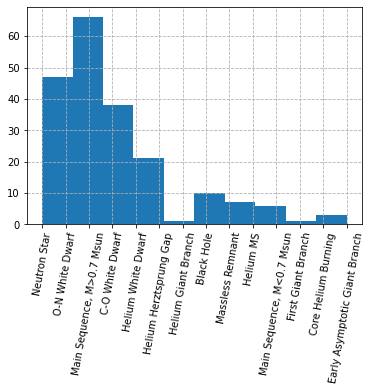

In [42]:
plt.hist([STELLAR_TYPES[t] for t in all_types])
plt.xticks(rotation='80');
plt.grid(linestyle='--');

## Total neutron star count over time

In [136]:
all_ages = []
all_types_over_time = []

In [137]:
for i in range(100):
    sm = open_detailed_run_summary(i)
    all_ages.append(np.array(sm['Age(1)'][:]))
    
    bse_types = []
    for s1, s2 in zip(sm['Stellar_Type(1)'][:], sm['Stellar_Type(2)'][:]):
        bse_types.append([s1, s2])
                               
    all_types_over_time.append(bse_types)

Neutron stars existing per time period: start date and end date

In [133]:
for age, types in zip(all_ages, all_types_over_time):
    for t_ind, t in enumerate(types):
        if t[0]==13 and t[1]!=13:

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.6917915554633065
1.8552565336373321
2.027306163891593
2.201355538944692
2.377594205575549
2.5562292735955863
2.7374865344059076
2.921611653237656
3.108871440868526
3.299555211296319
3.433956536099979
3.433956536099979
3.442518880835939
3.45090997867718
3.459133254561596
3.4671920649283234
3.4750896990877167
3.482829380563922
3.490414268410603
3.4978474585003507
3.5051319847883033
3.512270820550497
3.5192668795974464
3.526123017463457
3.5328420325721477
3.5394266673786645
3.545879609489051
3.5522034927572297
3.558400898360045
3.5644743558508036
0.0
1.0
101.0
601.0
1101.0
1601.0
2101.0
2601.0
3101.0
3601.0
4101.0
4601.0
5101.0
5601.0
6101.0
6601.0
7101.0
7601.0
8101.0
8601.0
9101.0
9601.0
10101.0
10601.0
11101.0
11601.0
12101.0
12601.0
13101.0
13601.0
14101.0
14101.0
0.0
0.0
0.0
0.0
0.0
0.15144708613153335
0.3029044395940912
0.45437222717660475
0.6058506183887159
0.7573397853

In [119]:
ns_times = []

for age, types in zip(all_ages, all_types_over_time):
    for t_ind, t in enumerate(types):
        if t==13:
            i = 1
            a = age[t_ind]
            while a==0.0:
                a = age[t_ind-i]
                i += 1
            ns_times.append(a)
            break

In [120]:
ns_times

[43.15188085789841,
 20.76997978447776,
 24.43241234348602,
 24.05907088786571,
 3.10109783852691,
 3.2710865999999736,
 31.999906914652456,
 3.5647803164139384,
 31.326310278987204,
 15.81994520382137,
 21.47289539464397,
 20.034391937477828,
 30.481174338191952,
 26.234065705896572,
 2.991258433675341,
 30.480040795381033,
 5.291964610544602,
 3.9131610345162664,
 1.4686940422055728,
 41.5503911816231,
 1.4461943139598652,
 12.341665547588178,
 1.0280056498799408,
 1.5892442373929938,
 1.0029632752755844,
 3.561419530438868,
 29.9437210602336,
 24.667175291246085,
 1.5073826288473111,
 2.438053532987857,
 45.607881495898475,
 6.2518982471834805,
 45.89055241318482,
 14.283123403582156]

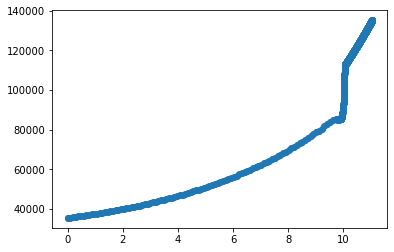

In [20]:
import matplotlib.pyplot as plt

plt.scatter(sm['Age(2)'][:], sm['Luminosity(2)'][:])

In [90]:
import matplotlib.pyplot as plt

In [91]:
semi_major_axes = sm['BSE_System_Parameters'][f'Semi-Major_Axis'][:]
stellar_masses1 = sm['BSE_System_Parameters'][f'Initial_Mass(1)'][:]
stellar_masses2 = sm['BSE_System_Parameters'][f'Initial_Mass(2)'][:]
stellar_types1 = sm['BSE_System_Parameters'][f'Stellar_Type(1)'][:]
stellar_types2 = sm['BSE_System_Parameters'][f'Stellar_Type(2)'][:]

In [92]:
mass_ratios = []
total_masses = []

for sm1, sm2 in zip(stellar_masses1, stellar_masses2):
    ratio = sm1/sm2 if sm1<sm2 else sm2/sm1
    mass_ratios.append(ratio)
    total_masses.append(sm1+sm2)

In [93]:
import plotly.express as px
import plotly
import numpy as np

plotly.offline.init_notebook_mode(connected=True)

In [111]:
def merger_msg(merger: bool) -> str:
    return 'Yes' if merger else 'No'

stellar_types = [STELLAR_TYPES[int(max(sm1, sm2))] for sm1, sm2 in zip(stellar_types1, stellar_types2)]
mergers = [merger_msg(m) for m in sm['BSE_System_Parameters']['Merger'][:]]

In [112]:
fig = px.scatter(x=semi_major_axes, y=mass_ratios, size=np.square(total_masses), color=stellar_types,
                 hover_name=stellar_types,
                 hover_data={
                     'Semi-major axis': semi_major_axes,
                     'Total mass': total_masses,
                     'Merger': mergers
                 })
fig.update_xaxes(title="Semi-major axis [Rsun]")
fig.update_yaxes(title="Mass ratio")

In [83]:
remove_summary()